# Barycentric Lagrange interpolation

Let us interpolate the Runge function on $[-1,+1]$
$$
f(x) = \frac{1}{1 + 16 x^2}
$$
using the Barycentric formula
$$
p(x) = \frac{ \sum_{i=0}^N \frac{w_i}{x - x_i} f_i }{ \sum_{i=0}^N \frac{w_i}{x - x_i} }
$$
where the weight $w_i$ is given by
$$
w_i = \frac{1}{\prod_{j=0,j\ne i}^N (x_i - x_j)}
$$

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

In [14]:
def fun(x):
    f = 1.0/(1.0+16.0*x**2)
    return f

In [15]:
def LagrangeInterpolation(X,Y,x):
    nx = np.size(x)
    nX = np.size(X)
    # compute the weights
    w = np.ones(nX)
    for i in range(nX):
        for j in range(nX):
            if i != j:
                w[i] = w[i]/(X[i]-X[j])
    # Evaluate the polynomial at x
    num= np.zeros(nx)
    den= np.zeros(nx)
    eps=1.0e-14
    for i in range(nX):
        num = num + Y[i]*w[i]/((x-X[i])+eps)
        den = den + w[i]/((x-X[i])+eps)
    f = num/den
    return f

In [16]:
xmin, xmax = -1.0, +1.0
N = 15 # Degree of polynomial

We first interpolate on uniformly spaced points.

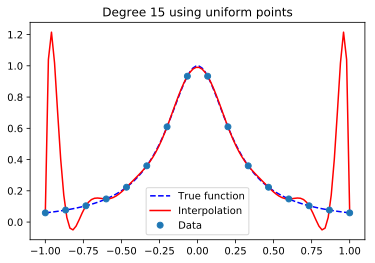

In [17]:
X = np.linspace(xmin,xmax,N+1)
Y = fun(X)
x = np.linspace(xmin,xmax,100)
fi = LagrangeInterpolation(X,Y,x)
fe = fun(x)
plt.plot(x,fe,'b--',x,fi,'r-',X,Y,'o')
plt.title('Degree '+str(N)+' using uniform points')
plt.legend(("True function","Interpolation","Data"),loc='lower center');

Next, we interpolate on Chebyshev points.

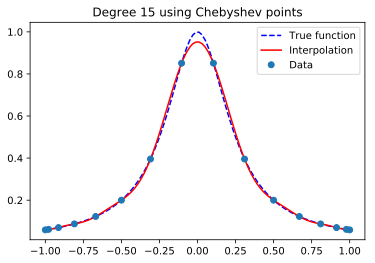

In [18]:
X = np.cos(np.linspace(0.0,np.pi,N+1))
Y = fun(X)
x = np.linspace(xmin,xmax,100)
fi = LagrangeInterpolation(X,Y,x)
fe = fun(x)
plt.plot(x,fe,'b--',x,fi,'r-',X,Y,'o')
plt.title('Degree '+str(N)+' using Chebyshev points')
plt.legend(("True function","Interpolation","Data"),loc='upper right');